Hypothesis testing is a statistical method used to make inferences and draw conclusions about a population based on sample data.
It involves formulating a null hypothesis and an alternative hypothesis,collecting data, and analyzing the data to determine whether there is sufficient evidence to reject or fail to reject the null hypothesis.

Steps to perform hypothesis testing
1.Data cleaning
2.create samples
3.state the null and alternate hypothesis
--null hypothesis       (mean=10)
--Alternate hypothesis  (mean!=10)
4.apply suitable testing 
5.calculate p-value
6.p-value>0.05 accept null hypothesis
  p-value<0.05 Reject null hypothesis

Importing required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("product_purchase_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'product_purchase_data.csv'

In [3]:
df

NameError: name 'df' is not defined

Problem Statement
a. It was observed that the average purchase made by the Men between the age 18-25 was 10000. Is it still the same?
b. It was observed that the percentage of women of that spend more than 10000 was 35%. Is it still the same?
c. Is the average purchase made by men and women of the age18-25 same?
d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

## Exploratory data analysis

In [4]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [6]:
 #changing all the values for 4+ to 4 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [8]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'],errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.1+ MB


In [10]:
print("Categories in 'User_ID' variable:     ",end=" " )
print(df['User_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Gender' variable:",end=" " )
print(df['Gender'].unique())

print("Categories in 'Age' variable:     ",end=" " )
print(df['Age'].unique())

print("Categories in 'Occupation' variable:     ",end=" " )
print(df['Occupation'].unique())

print("Categories in 'City_Category' variable:     ",end=" " )
print(df['City_Category'].unique())

print("Categories in 'Stay_In_Current_City_Years' variable:     ",end=" " )
print(df['Stay_In_Current_City_Years'].unique())

print("Categories in 'Marital_Status' variable:     ",end=" " )
print(df['Marital_Status'].unique())



Categories in 'User_ID' variable:      [1000001 1000002 1000003 ... 1005391 1001529      10]
Categories in 'Product_ID' variable:   ['P00069042' 'P00248942' 'P00087842' ... 'P00314742' 'P00236242' nan]
Categories in'Gender' variable: ['F' 'M' nan]
Categories in 'Age' variable:      ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25' nan]
Categories in 'Occupation' variable:      [10. 16. 15.  7. 20.  9.  1. 12. 17.  0.  3.  4. 11.  8. 19.  2. 18.  5.
 14. 13.  6. nan]
Categories in 'City_Category' variable:      ['A' 'C' 'B' nan]
Categories in 'Stay_In_Current_City_Years' variable:      [ 2.  4.  3.  1.  0. nan]
Categories in 'Marital_Status' variable:      [ 0.  1. nan]


In [11]:
df.isna().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,P00184942,M,46-50,7.0,B,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,P00145042,M,26-35,20.0,A,1.0,1.0,1.0,2.0,5.0,15665.0
14,1000006,P00231342,F,51-55,9.0,A,1.0,0.0,5.0,8.0,14.0,5378.0
16,1000006,P0096642,F,51-55,9.0,A,1.0,0.0,2.0,3.0,4.0,13055.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,1004472,P00262242,F,46-50,16.0,B,0.0,1.0,1.0,11.0,16.0,15175.0
263001,1004472,P00209742,F,46-50,16.0,B,0.0,1.0,1.0,11.0,15.0,15430.0
263003,1004472,P00345742,F,46-50,16.0,B,0.0,1.0,1.0,2.0,15.0,15387.0
263006,1004472,P00034142,F,46-50,16.0,B,0.0,1.0,8.0,13.0,16.0,5861.0


In [14]:
df.duplicated().sum()

0

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 4 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category']


In [16]:
col=["Gender","Product_ID","Age","City_Category"]

In [17]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,1000006,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,1000006,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,1004472,402,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,1004472,337,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,1004472,480,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0
263006,1004472,49,0,4,16.0,1,0.0,1.0,8.0,13.0,16.0,5861.0


## Data visualization 

<AxesSubplot:xlabel='Age', ylabel='count'>

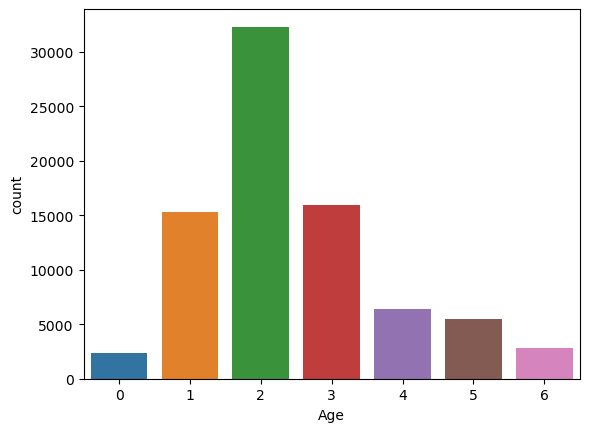

In [20]:
sns.countplot(df["Age"])

Insight: most of the purchases are made by people between age 26-35

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

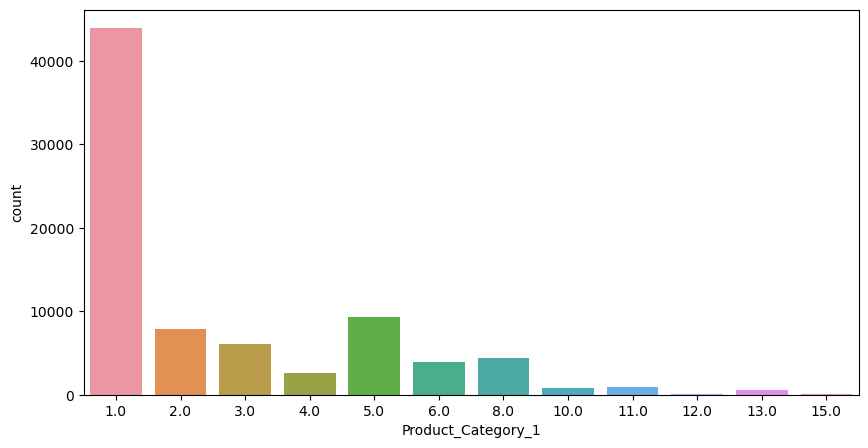

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product_Category_1',data=df)

Insight: product 1 is purchased more often

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

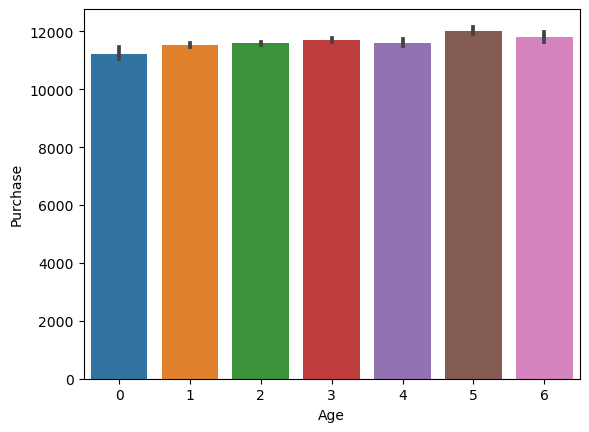

In [24]:
sns.barplot(x="Age",y="Purchase",data=df)

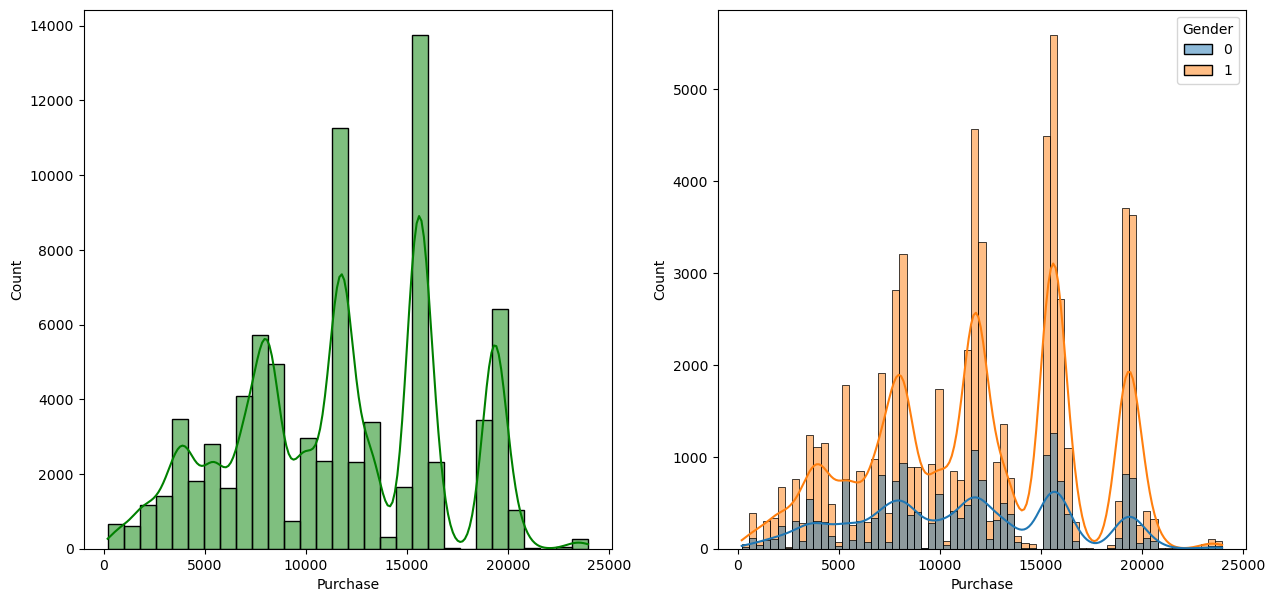

In [25]:
# Histogram and KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Purchase',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Purchase',kde=True,hue='Gender')
plt.show()

Insight: Most of the purchases are made by male customers

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Purchase')
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Purchase',kde=True,hue='Age')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='0'],x='Purchase',kde=True,hue='Age')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='1'],x='Purchase',kde=True,hue='Age')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = '0', '1'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['City_Category'].value_counts()
labels = '0','1'
color = ['red', 'green']



In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['1','0'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [ ]:
df.corr()

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

# Statistical Tests(Hypothesis testing)

# one Sample T test

# a. It was observed that the average purchase made by the Men between the age 18-25 was 10000. Is it still the same?

In [ ]:
new_data = df[(df['Age'] == 1) & (df['Gender'] == 1)]

In [ ]:
new_data

In [ ]:
sample = new_data.sample(1200, random_state=5)

In [ ]:
sample

## null hypothesis= mean will be equal to 10000
## alternate hypothesis= mean will not be equal to 10000

In [ ]:
#one sample t-test
from scipy.stats import ttest_1samp
a_mean=10000

In [ ]:
t_stat, p_value = ttest_1samp(sample['Purchase'], a_mean)
print(t_stat, p_value)

In [ ]:
sample_mean = sample['Purchase'].mean() 
sample_mean

Rejecting null hypothesis
Accepting the Alternate hypothesis

## b. It was observed that the percentage of women of that spend more than 10000 was 35%. Is it still the same?

In [ ]:
data_new = df[(df['Purchase'] > 10000)]

In [ ]:
data_new

In [ ]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%. 

In [ ]:
data_new['Gender'].value_counts()[0]

In [ ]:
len(data_new)

In [ ]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

#number of observations
nobs = len(data_new)

# hypothesised value
p0 = 0.35

In [ ]:
#one sample z test
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
z_stat, p_val = proportions_ztest(count=count,nobs=nobs,value=p0)

In [ ]:
print(z_stat, p_val)

In [ ]:
p value<0.05 , null hypothesis will be reject
Acepting alternative hypothesis

## c. Is the average purchase made by men and women of the age18-25 same?

In [ ]:
data_men = df[(df['Gender'] == 1)& (df['Age'] == 1)]
data_women = df[(df['Gender'] == 0) & (df['Age'] == 1)]

In [ ]:
data_men

In [ ]:
data_women

In [ ]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [ ]:
data_men_sample

In [ ]:
data_women_sample

In [ ]:
data_women_sample["Purchase"].var()

In [ ]:
data_men_sample["Purchase"].var()

In [ ]:
from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample["Purchase"], data_women_sample["Purchase"], equal_var=False)


In [ ]:
print(t_stat_2, p_val_2)

In [ ]:
pvalue<0.05 Reject the null hypothesis
accept alternate hypothesis

## d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [ ]:

data_age1 = df[(df['Age'] == 1) & (df['Purchase'] > 10000)]
data_age2 = df[(df['Age'] == 2) & (df['Purchase'] > 10000)]

In [ ]:
data_age1

In [ ]:
data_age2

In [ ]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(2000, random_state=0)

In [ ]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]
nobs=[1000,2000]

In [ ]:
(data_age1_sample['Gender'] == 1).sum()

In [ ]:
(data_age2_sample['Gender'] == 1).sum()

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

stat_2sample, p_value_2sample = proportions_ztest(count=count,nobs=nobs,value=0)

In [ ]:
stat_2sample, p_value_2sample

# Accepting the null hypothesis
